In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import signal
import scipy.ndimage

In [5]:
sobel_y = np.array([
                [-1, -2, -1],
                [0, 0, 0],
                [ 1, 2, 1]]) 

sobel_x = np.array([
                [-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

prewit_x = np.array([
                [-1, -2, -1],
                [0, 0, 0],
                [ 1, 2, 1]]) 

prewit_y = np.array([
                [ -1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

edge_vertical = np.array([
                [-1, 2, -1],
                [-1, 2, -1],
                [-1, 2, -1]])

edge_horizontal = np.array([
                [-1, -1, -1],
                [2, 2, 2],
                [-1, -1, -1]])

edge_45 = np.array([
                [2, -1, -1],
                [-1, 2, -1],
                [-1, -1, 2]]) 

edge_minus_45 = np.array([
                [-1, -1, 2],
                [-1, 2, -1],
                [2, -1, -1]]) 

In [6]:
A = np.array([
     [0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0],
     [10, 10, 10, 10, 10],
     [10, 10, 10, 10, 10],
     [10, 10, 10, 10, 10]]);

Gx = signal.convolve2d(A, sobel_x, boundary='symm', mode='same')
Gy = signal.convolve2d(A, sobel_y, boundary='symm', mode='same')
direction = np.arctan2(Gy, Gx)

print(direction)

[[ 0.          0.          0.          0.          0.        ]
 [-1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633]
 [-1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


In [7]:
A = np.array([
     [4, 5, 7, 8],
     [10, 9, 2, 12],
     [16, 16, 14, 14],
     [4, 16, 9, 13]]);

h = np.array([[-1, -1, -1],
                [-1, 8, -1],
                [ -1, -1, -1]]) 

G = signal.convolve2d(A, h, boundary='symm', mode='same')

print(G)

[[-19  -8   0   0]
 [  0  -2 -69  17]
 [ 43  48  21  23]
 [-60  40 -39   5]]


In [8]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 90, 90, 90, 90, 0, 0], 
                [0, 0, 0, 90, 90, 90, 90, 90, 0], 
                [0, 0, 0, 90, 90, 90, 90, 90, 0], 
                [0, 0, 0, 90, 90, 90, 90, 90, 90], 
                [0, 90, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0]])

mean = cv2.blur(img, (3, 3))
print(mean)

[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 30 30 20 10  0]
 [ 0  0 20 40 60 60 50 30 20]
 [ 0  0 30 60 90 90 80 50 40]
 [ 0  0 30 60 90 90 90 70 70]
 [20 10 30 40 60 60 60 50 50]
 [20 10 20 20 30 30 30 30 30]
 [20 10 10  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


In [9]:
img = np.array([[18, 22, 33, 25], 
                [34, 128, 24, 172], 
                [22, 19, 32, 31], 
                [17, 33, 32, 20]], dtype=np.uint8)

median = cv2.medianBlur(img, 3)
print(median)

[[22 24 25 25]
 [22 24 31 31]
 [22 32 32 31]
 [19 32 32 31]]


In [10]:
I = np.eye(5)
w = np.array([1, 1, 1])
print("erode\n", cv2.erode(I, w))
print("dilate\n", cv2.dilate(I, w))

erode
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
dilate
 [[1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]]


In [11]:
I = np.array([[3, 2, 4, 5],
              [7, 7, 8, 2],
              [3, 1, 2, 3],
              [5, 4, 6, 7]], dtype=np.uint8)
equ = cv2.equalizeHist(I)
print("Historgam Equalization\n", equ)

Historgam Equalization
 [[102  51 136 170]
 [238 238 255  51]
 [102   0  51 102]
 [170 136 187 238]]


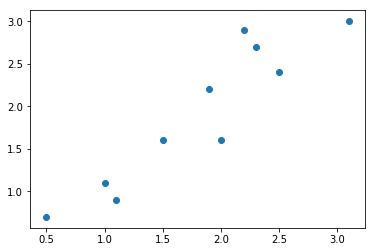

In [12]:
X = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1])
Y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])
plt.scatter(X, Y)

In [13]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
[0.616555556, 0.615444444],
[0.615444444, 0.716555556]])

# factorize
values, vectors = eig(A)
print(values, '\n\n', vectors)

[0.0490834  1.28402771] 

 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


In [14]:
img = np.array([[0, 0, 0, 0, 0], 
                [0, 0, 1, 1, 0], 
                [0, 0, 1, 1, 0], 
                [0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0]])

mean = cv2.blur(img, (3, 3))
print(mean)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


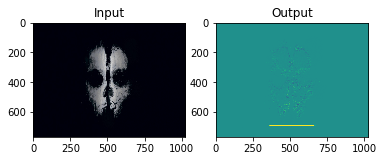

In [20]:
#To load directly as gray
#I = cv2.imread("images/ghost.png", 0)

original = cv2.imread("images/ghost.png") # BGR
I = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) # gray
O = signal.convolve2d(I, sobel_y, boundary='symm', mode='same') # output
plt.subplot(121),plt.imshow(original),plt.title('Input')
plt.subplot(122),plt.imshow(O),plt.title('Output')
plt.show()

# To remove color map, use the following format instead
# plt.subplot(121),plt.imshow(I, cmap='Greys_r'),plt.title('Input')

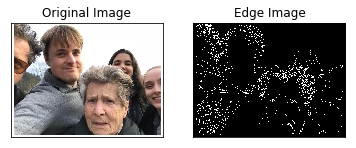

In [22]:
# Opencv loads in BGR, while matplotlib displays in RGB; so, without
# changing before display you get the colors backwards

img = cv2.imread('images/people.png', 1)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()